In [1]:
import sys
sys.path.append('../utils/')
sys.path.append('../paviaUTools/')

import matplotlib.pyplot as plt
from datasetLoader import datasetLoader
import os
import numpy as np
from whole_pipeline import whole_pipeline_all, whole_pipeline_divided, whole_pipeline_divided_parallel
import torch
from plots import *
from weights_anal import *
from consts import *
from MetaLearner import HDDOnBands



import gc
torch.cuda.empty_cache()
gc.collect()

%matplotlib inline
%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

c:\Users\amirb\AppData\Local\Programs\Python\Python38\lib\site-packages\cupy\_environment.py:216: UserWarning: CUDA path could not be detected. Set CUDA_PATH environment variable if CuPy fails to load.
  warnings.warn(


In [2]:
parent_dir = os.path.join(os.getcwd(),"..")
csv_path = os.path.join(parent_dir, 'datasets', 'paviaU.csv')
gt_path = os.path.join(parent_dir, 'datasets', 'paviaU_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'pavia.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'pavia_gt.csv')
# csv_path = os.path.join(parent_dir, 'datasets', 'KSC.csv')
# gt_path = os.path.join(parent_dir, 'datasets', 'KSC_gt.csv')

dsl = datasetLoader(csv_path, gt_path)

df = dsl.read_dataset(gt=False)
X = np.array(df)
X = X.reshape((610,340, 103))
# X = X.reshape((1096, 715, 102))
# X = X.reshape((512, 614, 176))

df = dsl.read_dataset(gt=True)
y = np.array(df)

factor = 29
rows_factor = factor
cols_factor = factor

X = torch.from_numpy(X)
y = torch.from_numpy(y)

X = X.to(device)
y = y.to(device)

In [5]:
import gc
torch.cuda.empty_cache()
gc.collect()

distances_bands = HDDOnBands.run(X, METRIC_BANDS)
distances_bands = distances_bands.to(device)

train_acc,test_acc, test_preds,test_gt = whole_pipeline_all(X,y, rows_factor, cols_factor, is_normalize_each_band=False, method_label_patch='most_common', method_type = REGULAR_METHOD, distances_bands=distances_bands)

# confusion_mat(test_gt,test_preds, range(1,12))


method is cosine!
XXXXXXX IN METHOD XXXXXXXXX
WHOLE METHOD TIME:  0.27150630950927734
XXXXXXX IN CLASSIFICATION XXXXXXXXX
total classified:  33687
total classified:  9088
Train Accuracy:  0.8814379434203105
Test Accuracy:  0.5357614436619719


torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')
torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')
torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')


[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CUDAGuardImpl.h:46] Warning: CUDA warning: driver shutting down (function uncheckedGetDevice)
[W CUDAGuardImpl.h:62] Warning: CUDA warning: invalid device ordinal (function uncheckedSetDevice)
[W CUDAGuardImpl.h:46] Warning: CUDA warning: driver shutting down (function uncheckedGetDevice)
[W CUDAGuardImpl.h:62] Warning: CUDA warning: invalid device ordinal (function uncheckedSetDevice)


torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')
TOTAL TIME FOR METHOD:  56.9823784828186
Train Accuracy:  0.9923011621439654
Test Accuracy:  0.8166118421052632


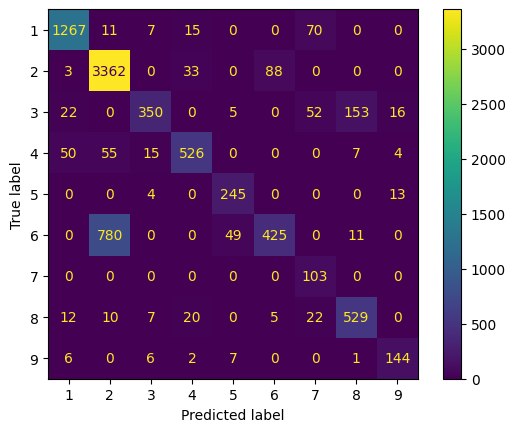

In [5]:
weights, dist_batches = HDDOnBands.classicUnsurpervisedClustering(X, clusters_amount=2, metric='cosine')
train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches, random_seed=-923723872)
confusion_mat(test_gt,test_preds, range(1,10))

In [6]:
import gc
torch.cuda.empty_cache()
gc.collect()

11304

torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')


torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')
torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')


[W CUDAGuardImpl.h:46] Warning: CUDA warning: driver shutting down (function uncheckedGetDevice)
[W CUDAGuardImpl.h:62] Warning: CUDA warning: invalid device ordinal (function uncheckedSetDevice)
[W CudaIPCTypes.cpp:15] Producer process has been terminated before all shared CUDA tensors released. See Note [Sharing CUDA tensors]
[W CUDAGuardImpl.h:46] Warning: CUDA warning: driver shutting down (function uncheckedGetDevice)
[W CUDAGuardImpl.h:62] Warning: CUDA warning: invalid device ordinal (function uncheckedSetDevice)


torch.any(M==torch.nan) ?  tensor(False, device='cuda:0')
TOTAL TIME FOR METHOD:  57.06395673751831
Train Accuracy:  0.9923011621439654
Test Accuracy:  0.8196663533834586


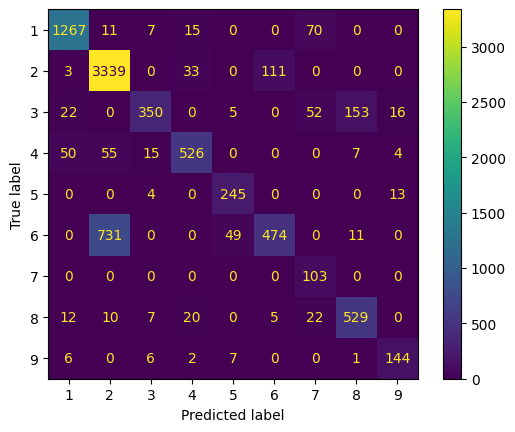

In [7]:
weights, dist_batches = HDDOnBands.regroupingUnsurpervisedClusters(X, clusters_amount=2, metric='cosine')
train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches, random_seed=-923723872)
confusion_mat(test_gt,test_preds, range(1,10))

In [8]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

# weights, dist_batches = HDDOnBands.createUniformWeightedBatches(X, clusters_amount=2)


# train_acc,test_acc, test_preds,test_gt = whole_pipeline_divided_parallel(X,y, rows_factor, cols_factor, is_normalize_each_band=True, method_label_patch='most_common', weights=weights, distance_batches= dist_batches)

# confusion_mat(test_gt, test_preds, range(1,10))
